In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<Figure size 1152x648 with 0 Axes>

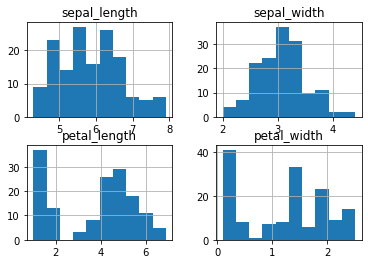

In [ ]:
plt.figure(figsize=(16,9))
df.hist();

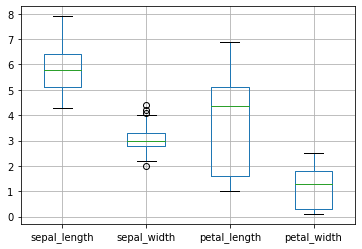

In [ ]:
df.boxplot()

In [ ]:
lower=df['sepal_width'].mean()-3*df['sepal_width'].std()
upper=df['sepal_width'].mean()+3*df['sepal_width'].std()
print(lower)
print(upper)

1.7497344785232403
4.3649321881434275


In [ ]:
new_df=df[(df.sepal_width>lower) & (df.sepal_width<upper)]
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
new_df.shape

(149, 5)

In the above method only one outlier is removed

In [ ]:
df['zscore']=((df.sepal_width)-(df.sepal_width.mean()))/(df.sepal_width.std())
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,zscore
0,5.1,3.5,1.4,0.2,setosa,1.015602
1,4.9,3.0,1.4,0.2,setosa,-0.131539
2,4.7,3.2,1.3,0.2,setosa,0.327318
3,4.6,3.1,1.5,0.2,setosa,0.097889
4,5.0,3.6,1.4,0.2,setosa,1.245030


In [ ]:
new_df2=df[(df.zscore>-3) & (df.zscore<3)]
new_df2.shape

(149, 6)

In [ ]:
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3=np.percentile(datacolumn,[25,75])
  IQR=Q3-Q1
  lower_range=Q1 - (1.5*IQR)
  upper_range=Q3 + (1.5*IQR)
  return lower_range,upper_range

In [ ]:
outlier_column=df.sepal_width

In [ ]:
lr,ur=(outlier_treatment(outlier_column))
print(lr,ur)

2.05 4.05


In [ ]:
outliers = outlier_column[(outlier_column>ur) | (outlier_column<lr)]
print(outliers)

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64


So These are indexes of 4 outliers

In [ ]:
df2=df.drop(outliers.index)
df2.shape

(146, 5)

In [ ]:
df.drop(outliers.index,inplace=True)

In [ ]:
df.shape

(146, 5)


So Now 4 Outliers are removed

